In [65]:
#Author: Rodrigo Sánchez y Mejía Rosete
#Reto: Explorando el índice de felicidad
#The Learning Gate: Data Science

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Instrucciones:
El Informe Mundial sobre la Felicidad es una encuesta que clasifica a 156 países por sus niveles de bienestar, tomando en cuenta 6 factores:
- Producción económica
- Apoyo social
- Esperanza de vida
- Libertad
- Generosidad
- Ausencia de corrupción

El primer informe se publicó en 2012 y continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más indicadores de felicidad para informar sus decisiones de formulación de políticas.

En este sentido, se tomará el estudio del 2019 para explorar los datos por país o región y obtener gráficas relevantes. El archivo incluye el puntaje (score) en una escala donde la mejor vida posible está representada con 10 y la peor con 0. Las siguientes columnas representan la medida en que los seis factores contribuyen a evaluar la felicidad en cada país.

Para lograr lo anterior, descarga el archivo Happiness_reporte.csv y el dataframe Metadata.csv, y realiza los siguientes pasos:

1. Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.


2. Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.


In [3]:
happiness = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pandas y Numpy/Subcon 3.1_Visualizacion de Datos/Reto/Happiness_report.csv")

In [4]:
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3. A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [5]:
mexico = happiness[(happiness['Country or region']=='Mexico')]
mexico

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
22,23,Mexico,6.595,1.07,1.323,0.861,0.433,0.074,0.073


In [6]:
mexico.set_index('Country or region', inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4. Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto

/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:567: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:905: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


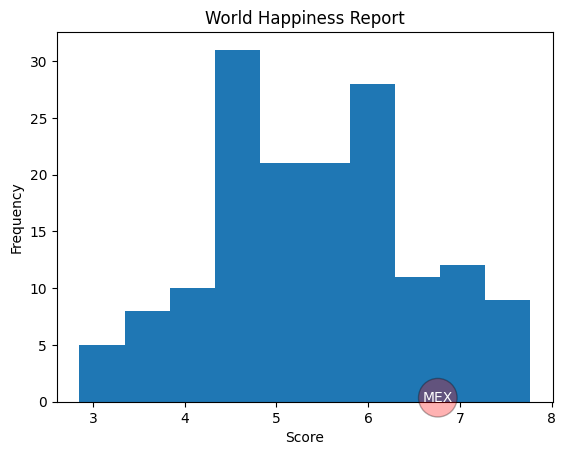

In [7]:
plt.hist(happiness['Score'])
plt.title('World Happiness Report')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.text(mexico['Score'],0,'MEX',bbox=dict(facecolor='red',alpha=0.3,boxstyle='circle'),color='white')
plt.show()

5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

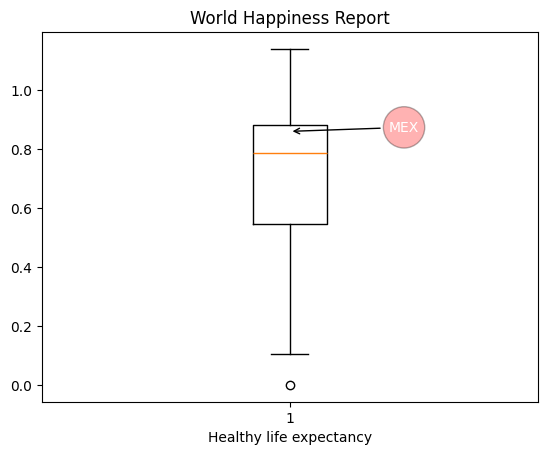

In [8]:
plt.boxplot(happiness['Healthy life expectancy'])
plt.title('World Happiness Report')
plt.xlabel('Healthy life expectancy')
mex_value = mexico['Healthy life expectancy'].values[0]
plt.annotate('MEX',xy=(1,mex_value),xytext=(1.2,mex_value),arrowprops=dict(arrowstyle='->'),bbox=dict(boxstyle='circle, pad=0.4',facecolor='red',alpha=0.3,pad=2),color='white')
plt.show()

6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

In [9]:
labels = mexico.columns[2:].tolist()
values = mexico.iloc[0,2:].tolist()
total = sum(values)
percentages = [(v / total) * 100 for v in values]

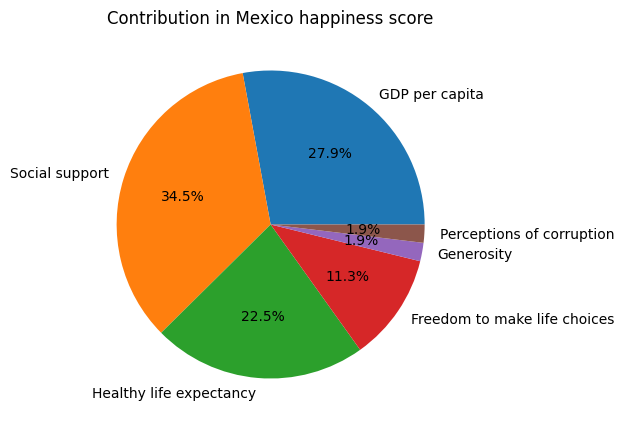

In [10]:
fig = plt.figure(figsize=(10,5))
plt.pie(percentages,labels=labels,autopct='%1.1f%%')
plt.title('Contribution in Mexico happiness score')

plt.show()

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [45]:
countries = pd.concat([happiness.iloc[[0,-1]],
                       happiness[happiness["Country or region"].isin(["Mexico","China","United States"])]])
countries

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
92,93,China,5.191,1.029,1.125,0.893,0.521,0.058,0.100


In [46]:
countries.set_index('Country or region', inplace=True)
countries

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
South Sudan,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091
United States,19,6.892,1.433,1.457,0.874,0.454,0.280,0.128
Mexico,23,6.595,1.070,1.323,0.861,0.433,0.074,0.073
China,93,5.191,1.029,1.125,0.893,0.521,0.058,0.100


In [47]:
countries =countries.sort_values(by='Score',ascending=False)
countries

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
United States,19,6.892,1.433,1.457,0.874,0.454,0.280,0.128
Mexico,23,6.595,1.070,1.323,0.861,0.433,0.074,0.073
China,93,5.191,1.029,1.125,0.893,0.521,0.058,0.100
South Sudan,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [48]:
countries_T = countries.T
countries_T

Country or region,Finland,United States,Mexico,China,South Sudan
Overall rank,1.000,19.000,23.000,93.000,156.000
Score,7.769,6.892,6.595,5.191,2.853
GDP per capita,1.340,1.433,1.070,1.029,0.306
Social support,1.587,1.457,1.323,1.125,0.575
Healthy life expectancy,0.986,0.874,0.861,0.893,0.295
Freedom to make life choices,0.596,0.454,0.433,0.521,0.010
Generosity,0.153,0.280,0.074,0.058,0.202
Perceptions of corruption,0.393,0.128,0.073,0.100,0.091


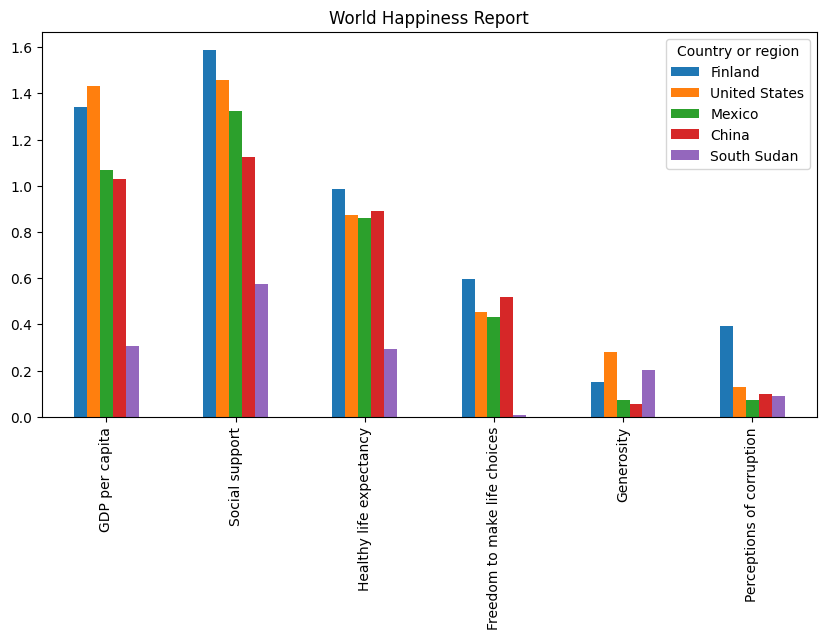

In [52]:
countries_T.iloc[2:,0:].plot(kind='bar',figsize=(10,5))
plt.title("World Happiness Report")
plt.xticks(rotation=90)
plt.legend(title="Country or region")
plt.show()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

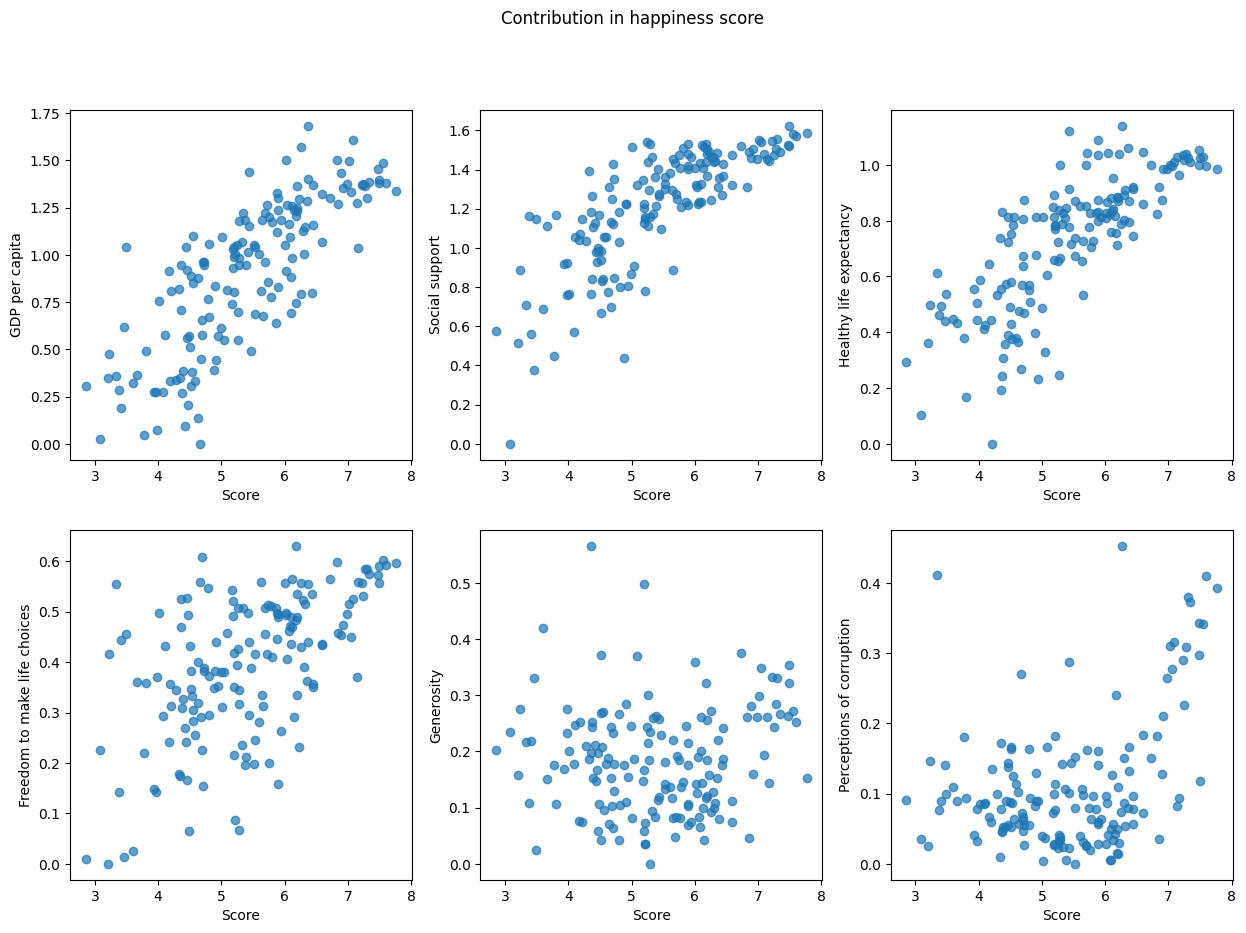

In [53]:
fig,axes = plt.subplots(2,3,figsize=(15,10))
fig.suptitle("Contribution in happiness score")

for i, factor in enumerate(happiness.columns[3:]):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(happiness["Score"], happiness[factor], alpha=0.7)
    ax.set_xlabel("Score")
    ax.set_ylabel(factor)
plt.show()

In [55]:
happiness.set_index('Country or region', inplace=True)
happiness

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025


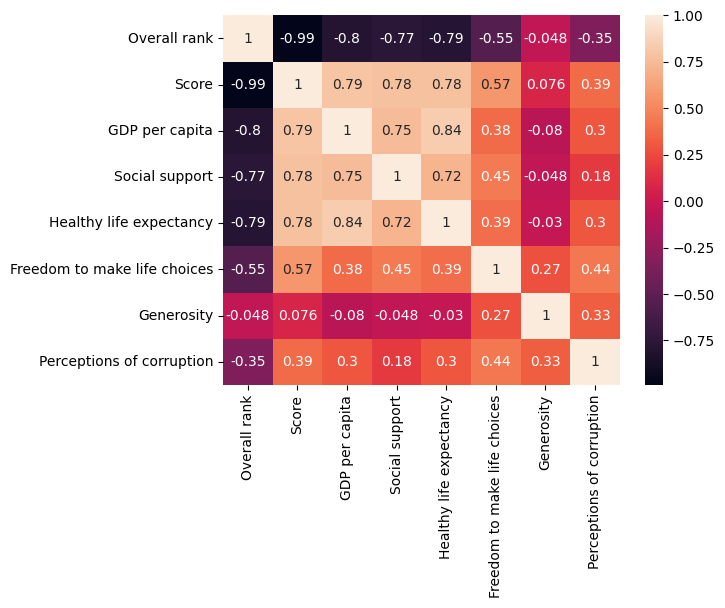

In [59]:
sns.heatmap(happiness.corr(),annot=True)
plt.show()

9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

In [60]:
metadata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pandas y Numpy/Subcon 3.1_Visualizacion de Datos/Reto/Metadata.csv")
metadata

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [61]:
merged_region = pd.merge(happiness,metadata,left_on='Country or region', right_on='TableName', how="inner")
merged_region

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Finland
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,Europe & Central Asia,High income,NaN,Denmark
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,Europe & Central Asia,High income,NaN,Norway
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,Europe & Central Asia,High income,NaN,Iceland
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,RWA,Sub-Saharan Africa,Low income,NaN,Rwanda
132,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,TZA,Sub-Saharan Africa,Lower middle income,NaN,Tanzania
133,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,AFG,South Asia,Low income,NaN,Afghanistan
134,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035,CAF,Sub-Saharan Africa,Low income,NaN,Central African Republic


In [62]:
avrg_region = merged_region.groupby('Region')['Score'].mean()
avrg_region

,Score
Region,
East Asia & Pacific,5.658769
Europe & Central Asia,6.104174
Latin America & Caribbean,6.007579
Middle East & North Africa,5.757429
North America,7.085000
South Asia,4.526857
Sub-Saharan Africa,4.260000


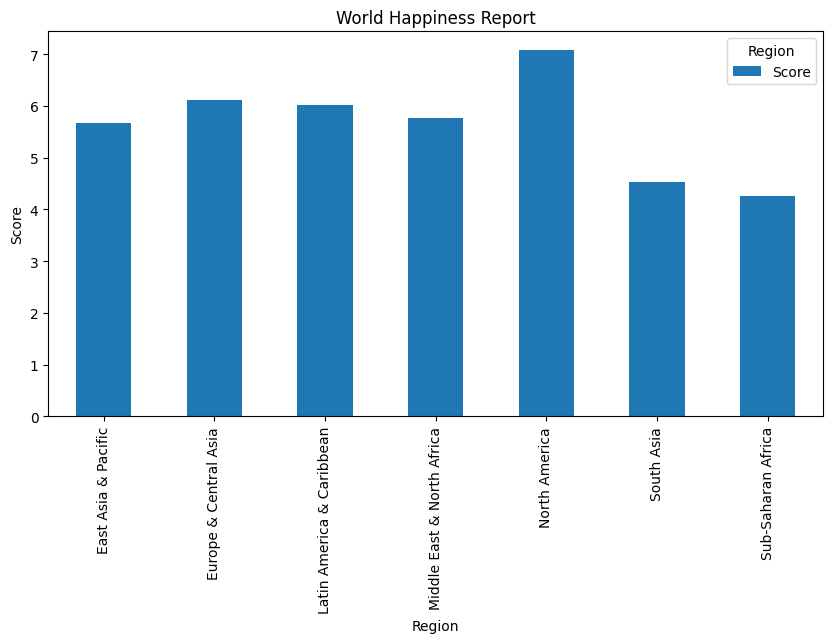

In [64]:
avrg_region.plot(kind='bar',figsize=(10,5))
plt.title("World Happiness Report")
plt.xticks(rotation=90)
plt.legend(title="Region")
plt.ylabel("Score")
plt.show()